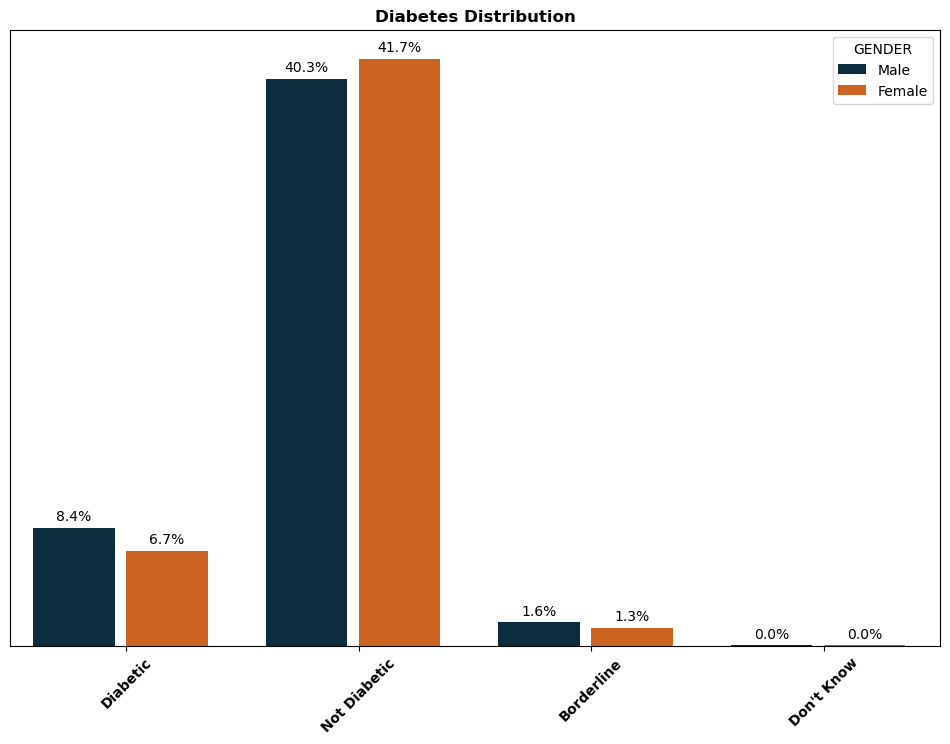

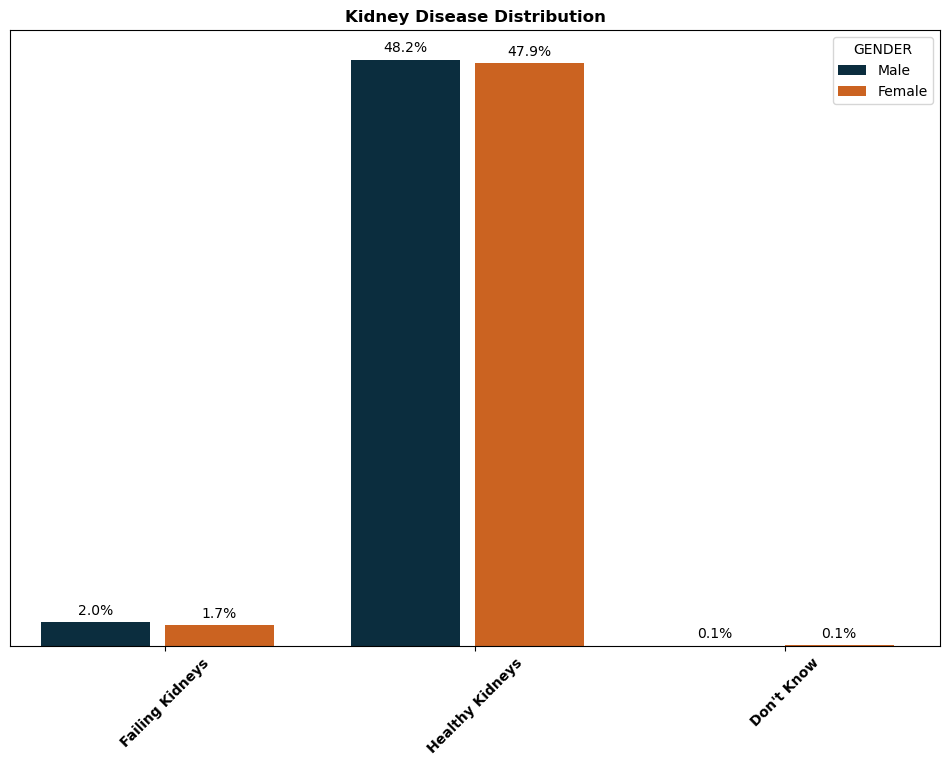

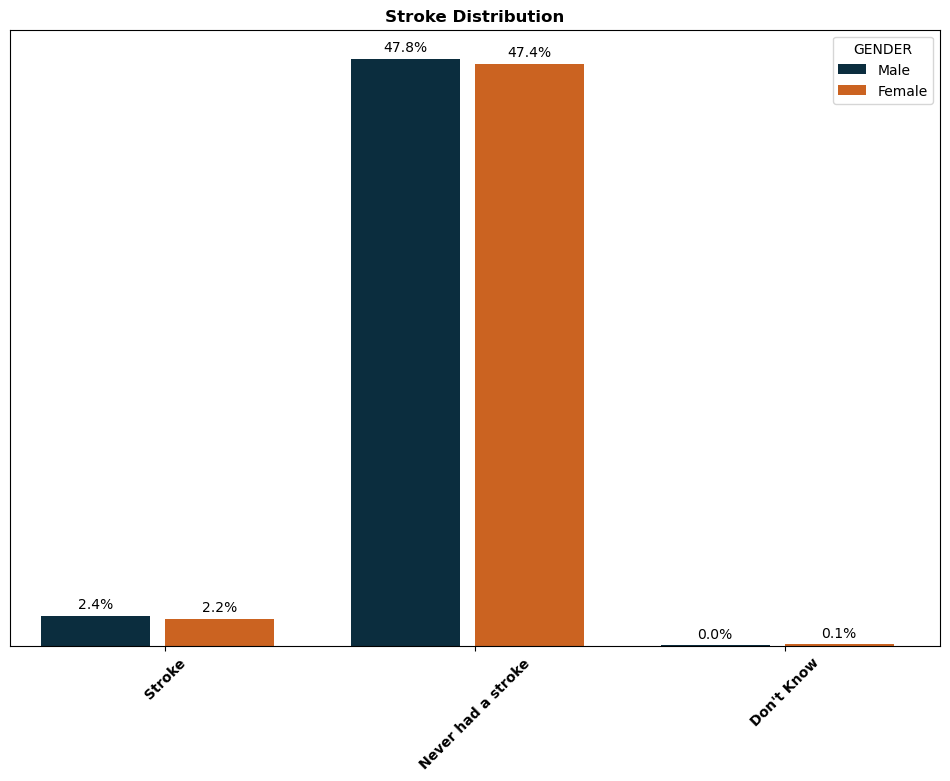

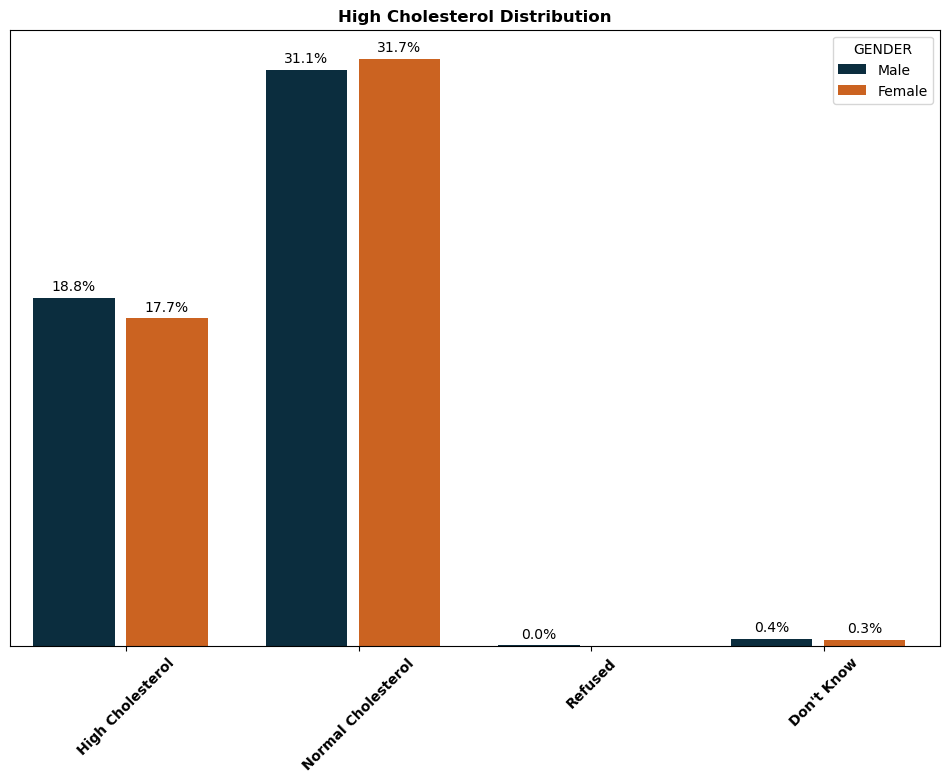

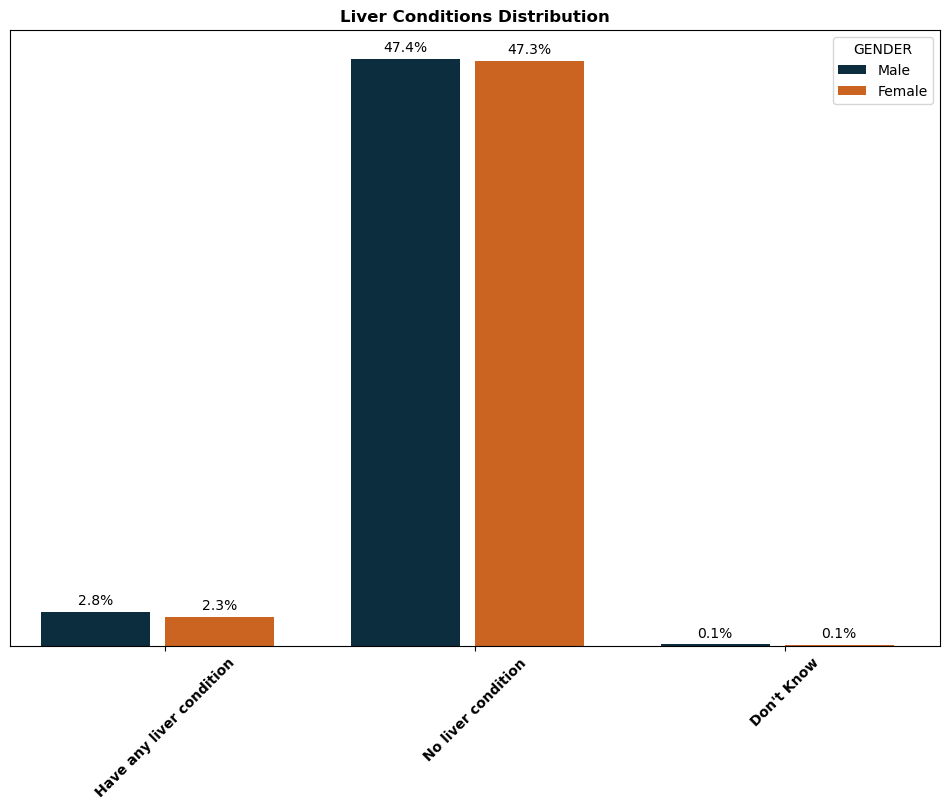

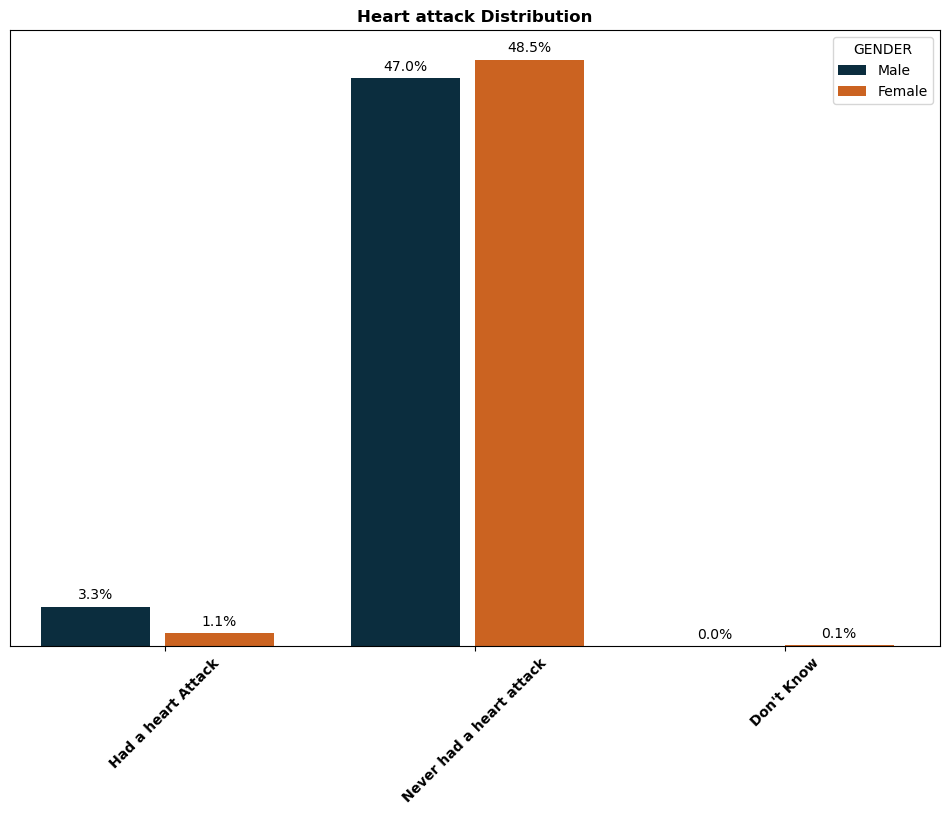

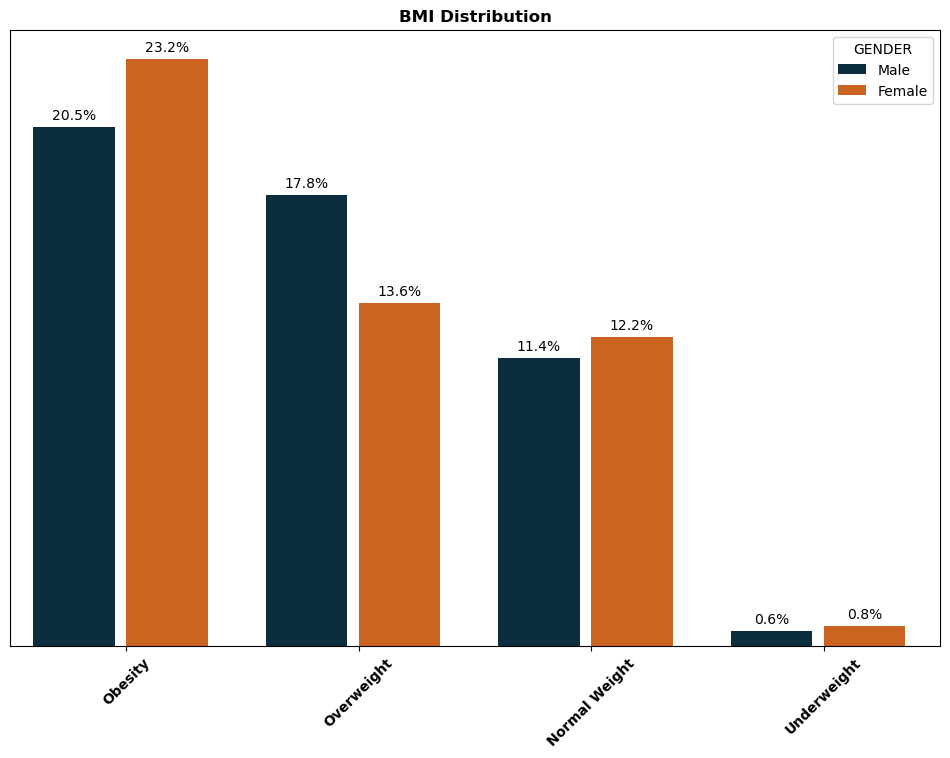

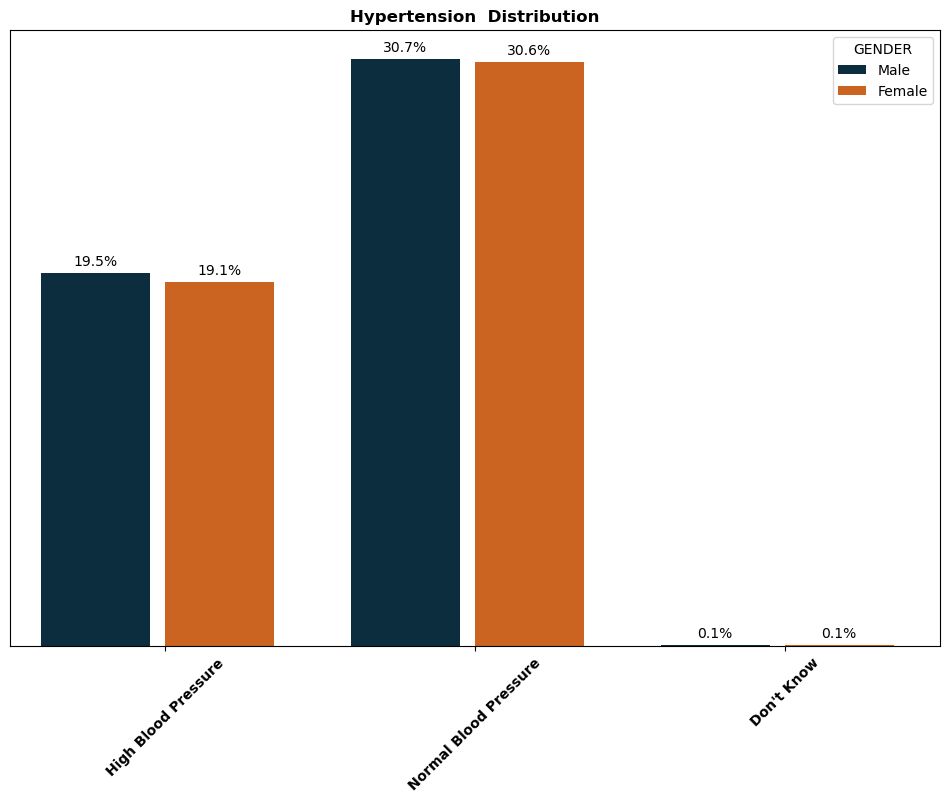

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


def plot_countplot(df, column, title, xticks_labels, hue='GENDER'):
    plt.figure(figsize=(12, 8)) 

    # Criar o gráfico de contagem
    ax = sns.countplot(data=df, x=column, hue=hue, palette=color_palette[:2], dodge=True)

    # Ajustar o título e os ticks
    ax.set_title(title, fontweight='bold')

    # Ajustar os ticks do eixo x
    unique_values = df[column].unique()
    tick_positions = np.arange(len(unique_values))
    ax.set_xticks(tick_positions)

    # Verificar se o número de rótulos é igual ao número de categorias únicas
    if len(xticks_labels) == len(unique_values):
        ax.set_xticklabels(xticks_labels, ha='center', rotation=45, fontweight='bold')
    else:
        print(f"Warning: Number of xticks_labels ({len(xticks_labels)}) does not match number of unique values ({len(unique_values)}) in the column '{column}'")

    ax.set_xlabel('')
    ax.grid(False)
    ax.yaxis.set_visible(False)

    # Ajustar a largura das barras e a separação entre barras
    bar_width = 0.35  # Ajuste conforme necessário
    for patch in ax.patches:
        patch.set_width(bar_width)

    # Calculando totais e porcentagens
    total = len(df)
    counts = [patch.get_height() for patch in ax.patches]
    percentages = [(count / total) * 100 for count in counts]

    # Ajustar a posição horizontal dos rótulos de porcentagem
    for patch, percentage in zip(ax.patches, percentages):
        x = patch.get_x() + patch.get_width() / 2
        y = patch.get_height()
        if percentage > 0:  # Evita anotar porcentagens zero
            ax.annotate(f"{percentage:.1f}%", (x, y + 0.5), ha='center', va='bottom', xytext=(0, 3), textcoords='offset points')

  # Adicionar a legenda com rótulos personalizados
    handles, _ = ax.get_legend_handles_labels()
    ax.legend(handles, ['Male', 'Female'], title=hue, loc='upper right')

    plt.show()



pd.set_option('display.max_columns', None)


color_palette = ['#023047', '#e85d04', '#0077b6', '#0096c7', '#ff9c33']


sns.set_palette(sns.color_palette(color_palette))

df = pd.read_excel('dados_demograficos_streamlit.xlsx')


def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 24.9:
        return 'Normal weight'
    elif 25 <= bmi < 29.9:
        return 'Overweight'
    else:
        return 'Obesity'


# Adicionar a coluna de categorias
df['BMI_Category'] = df['BMI'].apply(categorize_bmi)

plot_countplot(
    df=df,
    column='DIABETES',
    title='Diabetes Distribution',
    xticks_labels=['Diabetic', 'Not Diabetic', 'Borderline', "Don't Know"],
)

plot_countplot(
    df=df,
    column='KIDNEY_DISEASE',
    title='Kidney Disease Distribution',
    xticks_labels=['Failing Kidneys', 'Healthy Kidneys', "Don't Know"],
)

plot_countplot(
    df=df,
    column='STROKE',
    title='Stroke Distribution',
    xticks_labels=['Stroke', 'Never had a stroke', "Don't Know"],
)

plot_countplot(
    df=df,
    column='HIGH_CHOLESTEROL',
    title='High Cholesterol Distribution',
    xticks_labels=['High Cholesterol', 'Normal Cholesterol', 'Refused', "Don't Know"],
)

plot_countplot(
    df=df,
    column='LIVER_DISEASE',
    title='Liver Conditions Distribution',
    xticks_labels=['Have any liver condition', 'No liver condition', "Don't Know"],
)

plot_countplot(
    df=df,
    column='HEART_ATTACK',
    title='Heart attack Distribution',
    xticks_labels=['Had a heart Attack', 'Never had a heart attack', "Don't Know"],
)

plot_countplot(
    df=df,
    column='BMI_Category',
    title='BMI Distribution',
    xticks_labels=['Obesity', 'Overweight', 'Normal Weight', 'Underweight'],
)

df.BMI_Category.value_counts()

plot_countplot(
    df=df,
    column='HIGH_PRESSURE',
    title='Hypertension  Distribution',
    xticks_labels=['High Blood Pressure', 'Normal Blood Pressure', "Don't Know"],
)